# To. 뉴진스.. 

```
‘공공도서관 프로그램'으로 검색했을 때... 

문제 1. 키워드가 들어간 트윗 자체가 많이 없음 
-> ‘지역+도서관' 으로 추가 검색해보면 더 많은 자료가 나올 것 가틈. 

문제 2. 도서관 측에서 뿌린 홍보자료가 넘 많이 나옴 
-> 좋아요가 아예 없는 트윗은 삭제하니까 ㄱㅊ았음... 다른 검색키워드로는 어떨지 모르겠네여

```

In [1]:
!pip3 install snscrape

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchScraper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기 ('검색어 since:시작날짜 until:끝나는날짜')
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('다문화 도서관 since:2020-01-01 until:2022-08-23').get_items()):
    if i > 10000:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.likeCount])
    
# 다 긁어왔다면 데이터 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'content', 'Like'])
tweets_df

,Datetime,content,Like
0,2022-08-20 23:13:16+00:00,"[한국 사회와 다문화] 이 책을 통해 우리는 다문화를 어떠한 편견도 없이, 거리낌없...",0
1,2022-08-20 22:42:56+00:00,[한국 사회의 소수자들 : 결혼 이민자] 이 책은 한국사회의 새로운 구성원인 다문화...,0
2,2022-08-17 15:13:07+00:00,"[한국 사회와 다문화] 이 책을 통해 우리는 다문화를 어떠한 편견도 없이, 거리낌없...",0
3,2022-08-17 14:42:59+00:00,[한국 사회의 소수자들 : 결혼 이민자] 이 책은 한국사회의 새로운 구성원인 다문화...,0
4,2022-08-16 13:22:31+00:00,"광양중마도서관, 독서 취약계층 다문화가정 프로그램 운영\n\n오는 22일부터 5개월...",0
...,...,...,...
215,2020-02-20 01:02:03+00:00,"증평군립도서관, 다문화 거점공간으로 거듭난다\n\nhttps://t.co/J8QJx...",0
216,2020-02-14 06:23:08+00:00,양천도서관에서는 다문화가정 아동 그림동화 방문교육 자원활동가를 모집합니다. 뜻있는 ...,1
217,2020-02-01 04:55:57+00:00,처분하기 아깝고 애착가던 원서 동화책들도 권당 얼마받지도 못하고 아마 무게로 넘결을...,0
218,2020-01-23 02:08:52+00:00,"도서관은 원래부터 다양한 문화를 품고 있는 다문화의 공간이고, 활동을 하는 곳이다....",2


In [4]:
tweets_df = tweets_df.drop_duplicates(subset='content')

In [5]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df = tweets_df[tweets_df['Like']>0]

In [6]:
#여러 키워드로 검색 많이 해봐야 할 것 같아서 '검색결과+시작월일+끝나는월일+'의 형식으로 파일 저장했음
tweets_df.to_csv('다문화 도서관 20200101_20220823.csv', encoding="utf-8-sig", index=False)

In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import multiprocessing
import numpy as np
from collections import defaultdict
from tqdm import trange
import re
import numpy as np
from collections import defaultdict


data = pd.read_csv('다문화 도서관 20200101_20220823.csv',engine='python',encoding='utf-8-sig')
del data['Like']
data

,Datetime,content
0,2022-08-10 09:31:59+00:00,간만에 도서관 갔더니 다문화 코너가 생겨서 일본 동화책 읽고 왔는데 티라노가...티...
1,2022-07-27 02:16:57+00:00,문화체육관광부의 지원으로 운영이 되는 다문화서비스운영지원사업 #북적북적다문화인문학여...
2,2022-07-20 23:39:22+00:00,드라마가 아니더라도 현실에선 늘. 다문화 가정이 많은 지역에 살고 있는데 도서관 오...
3,2022-07-17 03:57:42+00:00,동네 도서관 아이들 코너에 왔는데 참 부럽네. 난 읽을 책이 없어서 오래된 신문을 ...
4,2022-06-28 01:21:00+00:00,"여주도서관, ｢도서관 다문화서비스 지원사업｣ 운영 “차이와 차별을 넘어선 어울림” ..."
5,2022-06-10 00:25:22+00:00,"우리 도서관 나 강하게 키우네 ,,, 입사 4일만에 다문화 도서 목록하기"
6,2022-05-20 01:59:21+00:00,"원주시립중앙도서관, 2022년 다문화 프로그램 운영 https://t.co/KbGL..."
7,2022-05-09 09:23:27+00:00,"&lt;답십리도서관 다문화 희망도서 신청 안내&gt;\n중국어, 일본어 등 다양한 ..."
8,2022-04-14 08:11:04+00:00,[두류도서관] 2022 다문화 프로그램 수강생 모집 &gt;&gt;https://t...
9,2022-03-25 09:47:14+00:00,@bidanbyam 관악구의 대학은 서울대뿐인데 정말 기이이이이이잎숙히 들어가야해서...


In [9]:
# Basic Cleaning Text Function
def Twitter_use_only(readData, Num=False, Eng=False):
    list_text = []
    
    for i in trange(len(data['content'])):
        
        pre_text = data['content'][i]
        # Retweets 제거
        text = re.sub('RT @[\w_]+: ', '', pre_text)

        # enticons 제거
        text = re.sub('@[\w_]+', '', text)

        # URL 제거
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
        text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    #     pattern = '(http|ftp|https)://(?:[-\w.]|(?:\da-fa-F]{2}))+'
    #     text = re.sub(pattern = pattern, repl = ' ',string=text)

        # Hashtag 제거
        text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

        # 쓰레기 단어 제거
        text = re.sub('[&]+[a-z]+', ' ', text)

        # 특수문자 제거
        text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)

        # 띄어쓰기 제거
        text = text.replace('\n',' ')

        if Num is True:
            # 숫자 제거
            text = re.sub(r'\d+',' ',text)

        if Eng is True:
            # 영어 제거 
            text = re.sub('[a-zA-Z]' , ' ', text)

        # 정리
        text = ' '.join(text.split())
        list_text.append(text)
    
#         print(list_text)

    del data['content']
    
    return list_text
# 문장 단어별 split
def WordList(data):
    f_list = []
    
    data['text'] = data['text'].astype(str)
    
    for i in trange(len(data)):
        f_list.append(data['text'][i].split())
    
    return f_list

text = Twitter_use_only(data)

text_df = pd.DataFrame(text)
data_df = pd.concat([data,text_df],axis=1)
data_df.columns = ['tweet_date', 'text']

data_df_reset = data_df.reset_index(drop=True)

100%|█████████████████████████████████████████| 36/36 [00:00<00:00, 2633.88it/s]


In [10]:
data_df_reset

,tweet_date,text
0,2022-08-10 09:31:59+00:00,간만에 도서관 갔더니 다문화 코너가 생겨서 일본 동화책 읽고 왔는데 티라노가 티라노...
1,2022-07-27 02:16:57+00:00,문화체육관광부의 지원으로 운영이 되는 다문화서비스운영지원사업 북적북적다문화인문학여행...
2,2022-07-20 23:39:22+00:00,드라마가 아니더라도 현실에선 늘 다문화 가정이 많은 지역에 살고 있는데 도서관 오전...
3,2022-07-17 03:57:42+00:00,동네 도서관 아이들 코너에 왔는데 참 부럽네 난 읽을 책이 없어서 오래된 신문을 읽...
4,2022-06-28 01:21:00+00:00,여주도서관 도서관 다문화서비스 지원사업 운영 차이와 차별을 넘어선 어울림
5,2022-06-10 00:25:22+00:00,우리 도서관 나 강하게 키우네 입사 4일만에 다문화 도서 목록하기
6,2022-05-20 01:59:21+00:00,원주시립중앙도서관 2022년 다문화 프로그램 운영
7,2022-05-09 09:23:27+00:00,답십리도서관 다문화 희망도서 신청 안내 중국어 일본어 등 다양한 언어로 만나는 다문...
8,2022-04-14 08:11:04+00:00,두류도서관 2022 다문화 프로그램 수강생 모집
9,2022-03-25 09:47:14+00:00,관악구의 대학은 서울대뿐인데 정말 기이이이이이잎숙히 들어가야해서 교통연결성이 증말 ...


In [39]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()



import sys

o_ll = []
for i in trange(len(ll_list)):
    real_text = okt.normalize(ll_list[i])
    o_ll.append(real_text)
result = ' '.join(o_ll)
#result

100%|███████████████████████████████████████████| 36/36 [00:00<00:00, 54.96it/s]


In [12]:
result

'간만에 도서관 갔더니 다문화 코너가 생겨서 일본 동화책 읽고 왔는데 티라노가 티라노가 돌에 깔려 죽었어 8ㅅ8 문화체육관광부의 지원으로 운영이 되는 다문화서비스운영지원사업 북적북적다문화인문학여행 프로그램을 운영합니다 많은 관심 바랍니다 송파도서관 도서관 송파구 오금동 다문화 인문학 문화체육관광부 드라마가 아니더라도 현실에선 늘 다문화 가정이 많은 지역에 살고 있는데 도서관 오전 그림 교실 한 번 신청하고 수업 끝난 오프 모임에 낀 미혼 여성은 인류애를 상실했습니다 다들 다문화 가정 정책에 대해 언급하면서 다문화 가정이 아닌 우리 얘들이 피해를 본다 소리를 하고 있어서 동네 도서관 아이들 코너에 왔는데 참 부럽네 난 읽을 책이 없어서 오래된 신문을 읽었더랬지 꼬마 아이 책 읽는 모습 참 예쁘다 다문화 코너라고 해서 외국 아이들 읽을 책도 준비한 걸 보면 이제 우리나라도 여유가 생긴 게 맞나 봐 평화롭다 유아방이야 뭐 원래 좀 시끄러운 법이지 여주도서관 도서관 다문화서비스 지원사업 운영 차이와 차별을 넘어선 어울림 우리 도서관 나 강하게 키우네 입사 4일만에 다문화 도서 목록하기 원주시립중앙도서관 2022년 다문화 프로그램 운영 답십리도서관 다문화 희망도서 신청 안내 중국어 일본어 등 다양한 언어로 만나는 다문화도서 다문화 희망도서를 신청해 보세요 신청방법은 도서관 누리집 공지사항에서 네이버폼 또는 양식 작성 후 이메일 로 신청 가능합니다 두류도서관 2022 다문화 프로그램 수강생 모집 관악구의 대학은 서울대뿐인데 정말 기이이이잎숙히 들어가야해서 교통연결성이 증말 안좋습니다 다른 도서관도 다 유아도서관 다문화도서관 등 손톱만한 수준이고 구립도서관도 진짜 이상한데 있어서 가기 힘들어요 집 앞 도서관에 일본어 동화책 많아서 좋아 다문화 정책의 일환으로 많아진거라는데 나같은 학습자에게 넘 좋음 ㅋㅋㅋ 평등길1110 영화 상영 평등한 수다회 사회 정혜실 차별금지법제정연대 장애 김병태 단원장애인자립생활센터 성소수자 물 성소수자부모모임 여성 지하 페미니스트 북카페 femm

In [24]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [38]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
print(len(df))
df[:30]

6


,index,cnt
0,도서,12
1,센터,12
2,가정,11
3,프로그램,10
4,신청,7
5,모집,7


In [30]:
df

,index,cnt
0,도서,12
1,센터,12
2,가정,11
3,프로그램,10
4,문화,9
...,...,...
329,일일,1
330,경험,1
331,원어민,1
332,전통,1


In [31]:
df.cnt.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [46]:
df_test= df[(df['cnt'] > 5)] #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 
len(df_test)

6

In [32]:
df_stop_words = df_test
df_stop_words = df_stop_words['index'].tolist()

In [33]:
with open('stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')



for i in stop_words:
    df_stop_words.append(i)
    
add_stop = set([
'도서관',
'다문화'
])

for a in add_stop:
    df_stop_words.append(a)

In [34]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in df_stop_words:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [36]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df_end=pd.DataFrame(series, columns=['cnt'])

df_end = df_end.reset_index()
df_end

,index,cnt
0,도서,12
1,센터,12
2,가정,11
3,프로그램,10
4,신청,7
5,모집,7


(-0.5, 3999.5, 2999.5, -0.5)

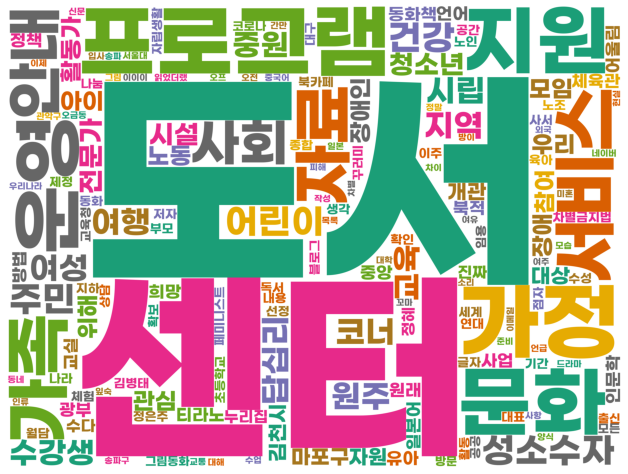

In [29]:
from wordcloud import WordCloud
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=160).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [ ]:
[계층 수요]
# 뉴스 키워드로 '계층' + '뉴스키워드' or ' 광범위한 키워드' --> 트위터 검색 
# 트위터로 계속 단어 전처리 
# 의미있는 단어 나오면 내용 살피고, 의미 있는 단어들이 워드클라우드에 많이 나오면 걔로 프로그램 인사이트 



# 데이터 너무 많으면 밑에 코드

In [ ]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()


list_1 = ll_list[:277374]
list_2 = ll_list[277374:]

import sys

o_ll = []
for i in trange(len(list_1)):
    o_ll.append(okt.nouns(list_1[i]))
    sys.stdout.flush()

o_ll2 = []
for i in trange(len(list_2)):
    o_ll2.append(okt.nouns(list_2[i]))
    sys.stdout.flush()
    
ss = []
sa = []
for i in range(len(o_ll)):
    ss.append(", ".join(o_ll[i]))
    
for i in range(len(o_ll2)):
    sa.append(", ".join(o_ll2[i]))
    
ss_df = pd.DataFrame(ss)
sa_df = pd.DataFrame(sa)

ss_df.to_csv('sample1.csv')
sa_df.to_csv('sample2.csv')

## 특정 키워드를 추출하는 함수 생성
- 수집된 트윗 내용으로부터 특정 키워드가 포함 되어있는지 찾아낸 후 키워드가 포함 되어있는 트윗을 찾아줌.
- 키워드가 포함되어있지 않는 경우 이를 삭제할 것인지 여부를 입력 파라미터에서 결정 가능
- 다수의 키워드를 한번에 입력할 수 있으며 이 경우 키워드 중 하나 이상이 트윗 내용에 존재하는 경우 참으로 간주됨

In [ ]:
# 인자 : 데이터 프레임 / 키워드 리스트 / 내용에 해당하는 컬럼 이름 / 헤시태그만 찾을 것인지 여부 / 키워드에 해당하는 내용이 없는 트윗 삭제 여부
# 리턴되는 결과 : 찾고자 하는 키워드가 있는 데이터가 존재하는 데이터 프레임
    # 조건 1: isOnlyHashtag 가 True 인 경우 키워드 앞에 # 를 붙여서 헤시태그에 해당하는 내용만 찾음 (False 인 경우 순수하게 키워드 존재 여부로 찾아주)
    # 조건 2 : isremove 가 True 인 경우 키워드를 찾지 못한 내용은 삭제한 후 리턴 (False 인경우 flag 만 붙여준 후 리턴)

    def search_keyword(df,keyword,contentCol,isOnlyHashtag,isremove):
    
    rs = df.copy(deep=True)
    target = rs[contentCol]
    keyword_low = []
    # 오로지 헤시태그만 찾고자 하는 경우 키워드 앞에 # 을 붙이는 과정을 진행한다.
    if(isOnlyHashtag == True):
        for k in range(0,len(keyword),1):
            keyword[k] = '#' + keyword[k]
    else:
        keyword = keyword
        
    for k in range(0,len(keyword),1):
        keyword_low.append(keyword[k].lower())
            
    rs['findKeywordFlag'] = False
    rs['findKeyword'] = ''
    
    row = -1
    for i in target: # 콘텐츠의 내용
        i_low = i.lower()
        row = row + 1
        for k in keyword_low: # 키워드 (대소문자는 구분하지 않음)
            
            if(i_low.find(k) >= 0): 
                rs['findKeywordFlag'][row] = True
                key = rs['findKeyword'][row]
                rs['findKeyword'][row] = rs['findKeyword'][row] +  k + '|'
                
    if(isremove == True):
        rs_L1 = rs[rs['findKeywordFlag'] == True]
        rs_L1 = rs_L1.reset_index(drop=True)
    else:
        rs_L1 = rs
        
    return rs_L1;

In [ ]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df1 = tweets_df[tweets_df['Like']>0]

In [ ]:
tweets_df1